In [2]:
# importing libraries
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [3]:
# preparing independent & dependent features
def prepare_data(timeseries_data, n_features):
    x, y = [],[]
    for i in range (len(timeseries_data)):
        end_ix = i + n_features                    # To find the end of series
        if end_ix > len(timeseries_data)-1:        # To check if we are beyond sequence
            break
        seq_x,  seq_y = timeseries_data[i:end_ix], timeseries_data [end_ix]      #Gathering i/p and o/p data from above code
        x.append(seq_x)
        y.append(seq_y)
    return np.array(x), np.array(y)

In [5]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]

#choose a number of time steps
n_steps = 3

#split into samples
x, y = prepare_data(timeseries_data, n_steps)

In [7]:
print(x), print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [8]:
x.shape

(6, 3)

In [9]:
# reshape from [samples, timesteps] to [samples, timesteps, features]
n_features = 1
x = x.reshape((x.shape[0], x.shape[1], n_features))

# Building LSTM Model

In [11]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(x, y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 10s 10s/step - loss: 29789.1094
Epoch 2/300
1/1 [==============================] - 0s 8ms/step - loss: 29115.5879
Epoch 3/300
1/1 [==============================] - 0s 8ms/step - loss: 28421.3301
Epoch 4/300
1/1 [==============================] - 0s 9ms/step - loss: 27729.6348
Epoch 5/300
1/1 [==============================] - 0s 10ms/step - loss: 27050.0723
Epoch 6/300
1/1 [==============================] - 0s 8ms/step - loss: 26380.6074
Epoch 7/300
1/1 [==============================] - 0s 9ms/step - loss: 25710.4590
Epoch 8/300
1/1 [==============================] - 0s 11ms/step - loss: 25027.9746
Epoch 9/300
1/1 [==============================] - 0s 6ms/step - loss: 24319.8066
Epoch 10/300
1/1 [==============================] - 0s 10ms/step - loss: 23569.3672
Epoch 11/300
1/1 [==============================] - 0s 10ms/step - loss: 22758.0312
Epoch 12/300
1/1 [==============================] - 0s 7ms/step - loss: 21869.8809
Epoch 13

1/1 [==============================] - 0s 10ms/step - loss: 6.0639
Epoch 103/300
1/1 [==============================] - 0s 7ms/step - loss: 5.7343
Epoch 104/300
1/1 [==============================] - 0s 7ms/step - loss: 5.5972
Epoch 105/300
1/1 [==============================] - 0s 9ms/step - loss: 5.4828
Epoch 106/300
1/1 [==============================] - 0s 7ms/step - loss: 5.3644
Epoch 107/300
1/1 [==============================] - 0s 8ms/step - loss: 5.0057
Epoch 108/300
1/1 [==============================] - 0s 10ms/step - loss: 5.2943
Epoch 109/300
1/1 [==============================] - 0s 7ms/step - loss: 4.8030
Epoch 110/300
1/1 [==============================] - 0s 7ms/step - loss: 4.9439
Epoch 111/300
1/1 [==============================] - 0s 9ms/step - loss: 4.5500
Epoch 112/300
1/1 [==============================] - 0s 8ms/step - loss: 4.6796
Epoch 113/300
1/1 [==============================] - 0s 9ms/step - loss: 4.3176
Epoch 114/300
1/1 [==============================] -

1/1 [==============================] - 0s 10ms/step - loss: 1.2271
Epoch 205/300
1/1 [==============================] - 0s 8ms/step - loss: 0.4674
Epoch 206/300
1/1 [==============================] - 0s 9ms/step - loss: 1.0313
Epoch 207/300
1/1 [==============================] - 0s 9ms/step - loss: 0.7441
Epoch 208/300
1/1 [==============================] - 0s 7ms/step - loss: 0.7927
Epoch 209/300
1/1 [==============================] - 0s 9ms/step - loss: 0.5296
Epoch 210/300
1/1 [==============================] - 0s 10ms/step - loss: 0.7999
Epoch 211/300
1/1 [==============================] - 0s 7ms/step - loss: 0.5925
Epoch 212/300
1/1 [==============================] - 0s 10ms/step - loss: 0.5993
Epoch 213/300
1/1 [==============================] - 0s 10ms/step - loss: 0.6868
Epoch 214/300
1/1 [==============================] - 0s 8ms/step - loss: 0.4259
Epoch 215/300
1/1 [==============================] - 0s 7ms/step - loss: 0.6053
Epoch 216/300
1/1 [==============================]

In [17]:
# demonstrate prediction for next 10 days
from numpy import array
x_input = array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[222.49289]
1 day input [196.        210.        222.4928894]
1 day output [[233.47108]]
2 day input [210.         222.4928894  233.47108459]
2 day output [[247.29362]]
3 day input [222.49289 233.47108 247.29362]
3 day output [[260.35007]]
4 day input [233.47108 247.29362 260.35007]
4 day output [[273.41995]]
5 day input [247.29362 260.35007 273.41995]
5 day output [[288.10287]]
6 day input [260.35007 273.41995 288.10287]
6 day output [[302.64392]]
7 day input [273.41995 288.10287 302.64392]
7 day output [[317.77704]]
8 day input [288.10287 302.64392 317.77704]
8 day output [[333.9852]]
9 day input [302.64392 317.77704 333.9852 ]
9 day output [[350.51144]]
[222.49289, 233.47108, 247.29362, 260.35007, 273.41995, 288.10287, 302.64392, 317.77704, 333.9852, 350.51144]


In [18]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [19]:
len(timeseries_data)

9

In [20]:
lst_output

[222.49289,
 233.47108,
 247.29362,
 260.35007,
 273.41995,
 288.10287,
 302.64392,
 317.77704,
 333.9852,
 350.51144]

Visualizing The Output

In [21]:
import matplotlib.pyplot as plt


In [22]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)


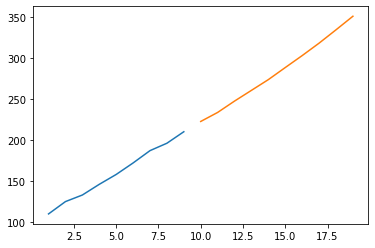

In [23]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)